<a href="https://colab.research.google.com/github/zhuoyingcai/NYC-Housing-Prices-Analysis/blob/master/NYC_Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Section

In [1]:
import os
import requests

# Data
import numpy as np
import pandas as pd

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
!pip install geopandas
import geopandas as gpd
from scipy import stats

# Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

import json

# Path Functions

In [0]:
def ensure_dir(path_to_dir):
  try:
      os.makedirs(path_to_dir)
  except FileExistsError:
      # directory already exists
      pass

# Config

In [3]:
# path config
annualizedSalesUpdate_data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/annualizedSalesUpdate'
data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/data/'

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# make sure dir exist
ensure_dir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Load and summarize data

In [0]:
# define dataframe
df = pd.DataFrame()

In [0]:
years = [2017, 2018]
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']

# load data
for year in years:
  for borough in boroughs:
    path = annualizedSalesUpdate_data_dir + '/%s_%s.xls' % (year, borough)
    data = pd.read_excel(path, header=4)
    df = df.append(data, sort=False)

We first visually inspect the data to see if there is any missing data or incorrect data types. Also, we may want to edit data entry.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170407 entries, 0 to 8385
Data columns (total 21 columns):
BOROUGH                           170407 non-null int64
NEIGHBORHOOD                      170407 non-null object
BUILDING CLASS CATEGORY           170407 non-null object
TAX CLASS AT PRESENT              170349 non-null object
BLOCK                             170407 non-null int64
LOT                               170407 non-null int64
EASE-MENT                         88660 non-null object
BUILDING CLASS AT PRESENT         170349 non-null object
ADDRESS                           170407 non-null object
APARTMENT NUMBER                  106536 non-null object
ZIP CODE                          170393 non-null float64
RESIDENTIAL UNITS                 170349 non-null float64
COMMERCIAL UNITS                  170349 non-null float64
TOTAL UNITS                       170349 non-null float64
LAND SQUARE FEET                  170346 non-null float64
GROSS SQUARE FEET                 1

In [7]:
df.head(10)

BOROUGH NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
5        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
6        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
7        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
8        2     BATHGATE  01 ONE FAMILY DWELLINGS                       
9        2     BATHGATE  01 ONE FAMILY DWELLINGS                       

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                    1   3028   25                                  A5   
1                    1   3030   55                                  A5   
2                    1   3030   56                                  A1   
3                    1   3030   56                                  A1   
4                    1   3030   65                                  A1   
5                    1   3030   70                                  A1   
6                    1   3036   13                                  A1   
7                    1   3037   42                                  A1   
8                    1   3037  101                                  S0   
9                    1   3043   55                                  A1   

                 ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
0    412 EAST 179 STREET                   ...                1.0   
1  410 EAST 182ND STREET                   ...                1.0   
2    412 EAST 182 STREET                   ...                1.0   
3    412 EAST 182 STREET                   ...                1.0   
4       4455 PARK AVENUE                   ...                1.0   
5       4445 PARK AVENUE                   ...                1.0   
6       4348 PARK AVENUE                   ...                1.0   
7       4428 PARK AVENUE                   ...                1.0   
8    443 EAST 180 STREET                   ...                1.0   
9   1948 BATHGATE AVENUE                   ...                1.0   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0               0.0          1.0            1842.0             2048.0   
1               0.0          1.0            1330.0             1460.0   
2               0.0          1.0            1306.0             1440.0   
3               0.0          1.0            1306.0             1440.0   
4               0.0          1.0            1622.0             1587.0   
5               0.0          1.0            1694.0             1497.0   
6               0.0          1.0            3525.0             1764.0   
7               0.0          1.0            3525.0             1340.0   
8               2.0          3.0            1293.0             2820.0   
9               0.0          1.0            2356.0             2047.0   

   YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
0      1901.0                          1                              A5   
1      1899.0                          1                              A5   
2      1899.0                          1                              A1   
3      1899.0                          1                              A1   
4      1899.0                          1                              A1   
5      1899.0                          1                              A1   
6      1899.0                          1                              A1   
7      1899.0                          1                              A1   
8      1952.0                          1                              S0   
9      1901.0                          1                              A

In [8]:
df.tail()

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
8381        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
8382        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8383        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8384        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
8385        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   

      BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT            ADDRESS  \
8381   7094   61       NaN                        V0  23 WILTSHIRE LANE   
8382   7267  289       NaN                        A5      41 JADE COURT   
8383   7267  298       NaN                        A5      11 JADE COURT   
8384   7267  299       NaN                        A5       9 JADE COURT   
8385   7346    1       NaN                        V0      GAYNOR STREET   

     APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
8381              NaN  ...                0.0               0.0          0.0   
8382              NaN  ...                1.0               0.0          1.0   
8383              NaN  ...                1.0               0.0          1.0   
8384              NaN  ...                1.0               0.0          1.0   
8385              NaN  ...                0.0               0.0          0.0   

      LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
8381            4427.0                0.0      2018.0   
8382            2955.0             2612.0      2018.0   
8383            4108.0             2612.0      2018.0   
8384           11019.0             2612.0      2018.0   
8385           42016.0                0.0         0.0   

      TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE SALE PRICE  \
8381                          1                              V0     793216   
8382                          1                              V0     671026   
8383                          1                              V0     610950   
8384                          1                              V0     672043   
8385                          1                              V0          0   

      SALE DATE  
8381 2018-05-25  
8382 2018-10-04  
8383 2018-07-23  
8384 2018-08-07  
8385 2018-09-21  

[5 rows x 21 columns]

# 2. Data Cleaning

---

We found two problems:

 1. we see that the dataframe has 170407 entries, but TAX CLASS AT PRESENT, EASE-MENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET and YEAR BUILT has less entries.
 
 2. The BROUGH is represented as numerical values rather than categorical.
 
 3. There are some data does not make sense, such as ZIP CODE, GROSS SQUARE FEET, YEAR BUILT and SALE PRICE can not be 0.


---


 What we are going to do next:
 
 1. rename BOROUGH values to actual borough name.
 
 2. drop columns that we are not going to use.
 
 3. remove raws with null or 0  ZIP CODE, SALE PRICE, GROSS SQUARE FEET, LAND SQUARE FEET and YEAR BUILT.
 
 4. standard data clean process to clean duplicate raws,  raws with Nah value.

---



In [0]:
df['BOROUGH'] = df['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [0]:
df = df.drop(['TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS','APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE' ], axis=1)

In [0]:
df = df[df['SALE PRICE'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['YEAR BUILT'] != 0]
df = df[df['ZIP CODE'] != 0]

In [0]:
df = df.drop_duplicates(keep='last')
df = df.dropna()

In [13]:
df = df.astype({"ZIP CODE": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64142 entries, 1 to 8384
Data columns (total 15 columns):
BOROUGH                      64142 non-null object
NEIGHBORHOOD                 64142 non-null object
BUILDING CLASS CATEGORY      64142 non-null object
BLOCK                        64142 non-null int64
LOT                          64142 non-null int64
ZIP CODE                     64142 non-null int64
RESIDENTIAL UNITS            64142 non-null float64
COMMERCIAL UNITS             64142 non-null float64
TOTAL UNITS                  64142 non-null float64
LAND SQUARE FEET             64142 non-null float64
GROSS SQUARE FEET            64142 non-null float64
YEAR BUILT                   64142 non-null float64
TAX CLASS AT TIME OF SALE    64142 non-null int64
SALE PRICE                   64142 non-null int64
SALE DATE                    64142 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 7.8+ MB


##2.1 Focus on tax classes 1 and 2

---

Since we are just interested in residential real estate, so we would like to limit our analysis to homes in tax classes 1 and 2.

We also drop columns that not related to homes in tax classes 1 and 2.

In [0]:
df = df[df['TAX CLASS AT TIME OF SALE'] == (1 or 2)]

In [0]:
df = df.drop(['TAX CLASS AT TIME OF SALE','COMMERCIAL UNITS', 'TOTAL UNITS'], axis=1)

## 2.2 Outlier
We also want to look at the distribution of our SALE PRICE.

1. We noticed that there are some extremely expensive house located in Manhattan, we would like to look at it and decide whether include them in our project or not.

2. The documentation of this data set explained there will be $0 sales price which means that there was a transfer of ownership without a cash consideration. However, there are some other values indicate there was a transfer of ownership which is not in the consideration of our project.

In [16]:
df['SALE PRICE'].value_counts(dropna=False).head(10)

10        1103
600000     592
550000     579
650000     552
700000     532
450000     520
400000     492
800000     491
500000     491
750000     467
Name: SALE PRICE, dtype: int64

In [17]:
df.nlargest(10, 'SALE PRICE')

BOROUGH               NEIGHBORHOOD  \
10476  Manhattan                       SOHO   
11579  Manhattan    UPPER EAST SIDE (59-79)   
10449  Manhattan    UPPER EAST SIDE (59-79)   
10434  Manhattan    UPPER EAST SIDE (59-79)   
3099   Manhattan  GREENWICH VILLAGE-CENTRAL   
11583  Manhattan    UPPER EAST SIDE (59-79)   
10435  Manhattan    UPPER EAST SIDE (59-79)   
12111  Manhattan    UPPER EAST SIDE (79-96)   
10432  Manhattan    UPPER EAST SIDE (59-79)   
4124   Manhattan     GREENWICH VILLAGE-WEST   

                           BUILDING CLASS CATEGORY  BLOCK  LOT  ZIP CODE  \
10476  02 TWO FAMILY DWELLINGS                        499    6     10012   
11579  01 ONE FAMILY DWELLINGS                       1387   65     10021   
10449                      01 ONE FAMILY DWELLINGS   1410   68     10021   
10434                      01 ONE FAMILY DWELLINGS   1383   60     10021   
3099                       01 ONE FAMILY DWELLINGS    574   63     10011   
11583  01 ONE FAMILY DWELLINGS                       1391    8     10021   
10435                      01 ONE FAMILY DWELLINGS   1388   67     10021   
12111                      01 ONE FAMILY DWELLINGS   1508    6     10075   
10432                      01 ONE FAMILY DWELLINGS   1382    8     10065   
4124   03 THREE FAMILY DWELLINGS                      623   49     10014   

       RESIDENTIAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
10476                2.0            2500.0             7000.0      1910.0   
11579                1.0            2299.0             6230.0      1899.0   
10449                1.0            3678.0            11991.0      2012.0   
10434                1.0            3314.0             9688.0      1920.0   
3099                 1.0            2321.0             8310.0      1900.0   
11583                1.0            2507.0             6860.0      1923.0   
10435                1.0            2529.0             9413.0      1910.0   
12111                1.0            2043.0             4253.0      1901.0   
10432                1.0            2510.0             7786.0      1910.0   
4124                 3.0            2996.0             5750.0      1910.0   

       SALE PRICE  SALE DATE  
10476    43500000 2017-04-24  
11579    41000000 2017-01-31  
10449    40250000 2018-08-16  
10434    39000000 2018-03-14  
3099     37200000 2018-07-11  
11583    33200000 2017-03-07  
10435    31950000 2018-09-27  
12111    30000000 2018-05-10  
10432    28500000 2018-04-04  
4124     27400000 2017-02-27

In [18]:
lst = df['SALE PRICE'].unique().tolist()
lst = np.sort(lst, axis = None)
lst[:100]

array([    1,     3,    10,    15,    20,    60,   100,   125,   200,
         210,   396,   416,   500,   700,   825,  1000,  1006,  1041,
        1162,  1500,  1787,  1895,  2000,  2352,  2416,  2500,  3000,
        3317,  3500,  3582,  3750,  3774,  3900,  3937,  4000,  4500,
        4700,  4800,  4900,  4997,  5000,  5041,  5100,  5200,  5300,
        5500,  5700,  6000,  6081,  6250,  6270,  6300,  6400,  6438,
        6500,  6533,  6562,  6650,  7000,  7500,  7923,  7980,  8000,
        8250,  8500,  9500,  9828, 10000, 10001, 10500, 11000, 11500,
       11666, 12000, 12497, 12500, 12950, 13333, 13870, 14583, 15000,
       15238, 15387, 15523, 16000, 16500, 16544, 17500, 18000, 18216,
       18500, 19000, 19440, 20000, 21000, 21100, 21962, 22000, 22582,
       22797])

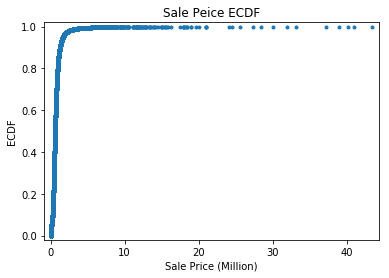

In [19]:
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

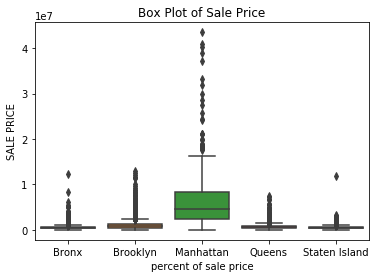

In [20]:
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('percent of sale price')
plt.show()

## 2.3 Cut Unreal Price

From the above data, we conclude that:

1. We think the price of the most expensive buildings is reasonable. The average price for each units is not unacceptable. Hoever, We decided not to keep those data because those value is extremly large and way too far from the mean. We will set a maximum price range for the data.

2. There are a lot of extremely low sale price which indicates that there was a transfer of ownership. In order to solve this problem, we decided to set a minimum price range for the data.

---

We set price range from ten thousands up to three millions. Houses in this price is what we can accept and would like to purchase it.

In [0]:
# set max price to be 10000000
df = df[(df['SALE PRICE'] < 3000000)]
# set min price to be 50000
df = df[(df['SALE PRICE'] > 100000)]

Let's see the boxplot of sale price:

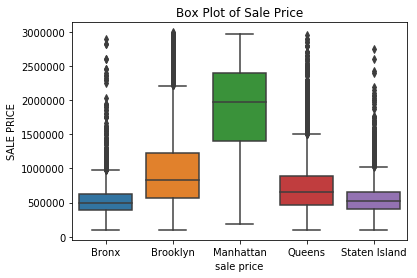

In [22]:
# shows the average price in each boroughs
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

However, there are still many outliers. We use Z-Score to find and drop those outliers.

---

Formula for Z score = (Observation — Mean)/Standard Deviation

In [0]:
df_index = df.set_index('BOROUGH', drop=False)

# separate data by borough
df_Bronx = df_index.loc['Bronx']
df_Brooklyn = df_index.loc['Brooklyn']
df_Manhattan = df_index.loc['Manhattan']
df_Queens = df_index.loc['Queens']
df_StatenIsland = df_index.loc['Staten Island']

# compute z score of each borough
z_Bronx = np.abs(stats.zscore(df_Bronx['SALE PRICE']))
z_Brooklyn = np.abs(stats.zscore(df_Brooklyn['SALE PRICE']))
z_Manhattan = np.abs(stats.zscore(df_Manhattan['SALE PRICE']))
z_Queens = np.abs(stats.zscore(df_Queens['SALE PRICE']))
z_StatenIsland = np.abs(stats.zscore(df_StatenIsland['SALE PRICE']))

# remove outliers
threshold = 3

df_Bronx = df_Bronx[(z_Bronx < threshold)]
df_Brooklyn = df_Brooklyn[(z_Brooklyn < threshold)]
df_Manhattan = df_Manhattan[(z_Manhattan < threshold)]
df_Queens = df_Queens[(z_Queens < threshold)]
df_StatenIsland = df_StatenIsland[(z_StatenIsland < threshold)]

# merge all borough data
df = pd.DataFrame()

df = df.append(df_Bronx, sort=False)
df = df.append(df_Brooklyn, sort=False)
df = df.append(df_Manhattan, sort=False)
df = df.append(df_Queens, sort=False)
df = df.append(df_StatenIsland, sort=False)

# Remove outliers: BLOCK, LOT, RESIDENTIAL UNITS, COMMERCIAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET
outlier_columns = ['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
for outlier_column in outlier_columns:
  z = np.abs(stats.zscore(df[outlier_column]))
  df = df[(z < threshold)]

# 3. Data Visualization

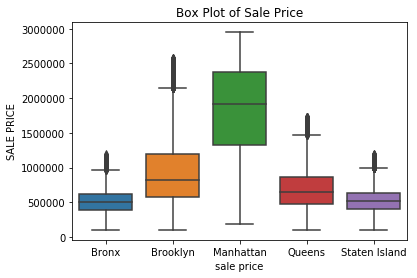

In [24]:
# box plot
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.title('Box Plot of Sale Price')
_ = plt.xlabel('Boroughs')
_ = plt.xlabel('sale price')
plt.show()

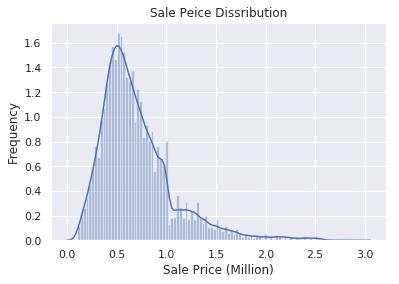

In [25]:
sns.set()
_ = sns.distplot(df['SALE PRICE']/1000000, bins=100)
plt.title('Sale Peice Dissribution')
plt.xlabel('Sale Price (Million)')
plt.ylabel('Frequency')
plt.show()

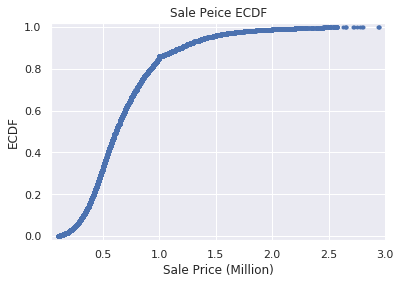

In [26]:
# make Empirical cumulative distribution function (ECDF)
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

From above graph, we notice that most of the houses were trading between 0.5 million to 1 moillion. In addition, there is a peak in 1 million which mean house with sale price of 1 million is also very popular.

---

As we know, the hoursing price are has a huge different in different borough. We plot the two more graph in order to see the how the horsing price realted to borough. We can conclude that:

1. Most of the housing prices are below one milion. 

2. The housing price in Manhattan is the most diverse. However, The Bronx and Staten Island rarely have housing prices for over one milion.

3. Ordering by turnover rate, Manhattan >> Brooklyn > Queen > Bronx > Staten Island.

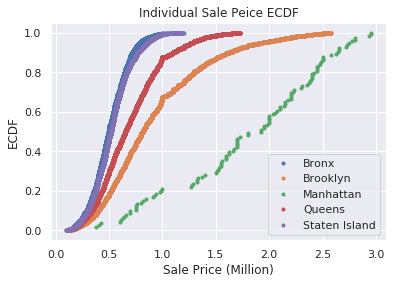

In [27]:
# gets borough list
boroughs = df['BOROUGH'].unique().tolist()
df_index = df.set_index('BOROUGH', drop=False)

# draw ECDFs
for borough in boroughs:
  x = np.sort(df_index.loc[borough]['SALE PRICE']/1000000)
  y = np.arange(1, len(x)+1) / len(x)
  _ = plt.plot(x, y, marker='.', linestyle='none')

plt.legend(boroughs)
_ = plt.title('Individual Sale Peice ECDF')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.show()

Reset index here!

In [0]:
df.index = range(df['SALE PRICE'].count())

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46926 entries, 0 to 46925
Data columns (total 12 columns):
BOROUGH                    46926 non-null object
NEIGHBORHOOD               46926 non-null object
BUILDING CLASS CATEGORY    46926 non-null object
BLOCK                      46926 non-null int64
LOT                        46926 non-null int64
ZIP CODE                   46926 non-null int64
RESIDENTIAL UNITS          46926 non-null float64
LAND SQUARE FEET           46926 non-null float64
GROSS SQUARE FEET          46926 non-null float64
YEAR BUILT                 46926 non-null float64
SALE PRICE                 46926 non-null int64
SALE DATE                  46926 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 4.3+ MB


# How were the hoursing prices chaged among the five boroughs over the past two years?

---

## ZIP Code Definitions of New York City Neighborhoods

In [31]:
url = "http://data.beta.nyc//dataset/3bf5fb73-edb5-4b05-bb29-7c95f4a727fc/resource/6df127b1-6d04-4bb7-b983-07402a2c3f90/download/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson"
gdf = gpd.read_file(url)
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
OBJECTID      262 non-null int64
postalCode    262 non-null object
PO_NAME       262 non-null object
STATE         262 non-null object
borough       262 non-null object
ST_FIPS       262 non-null object
CTY_FIPS      262 non-null object
BLDGpostal    262 non-null int64
@id           262 non-null object
longitude     262 non-null float64
latitude      262 non-null float64
geometry      262 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 24.6+ KB


OBJECTID postalCode          PO_NAME STATE borough ST_FIPS CTY_FIPS  \
0         1      11372  Jackson Heights    NY  Queens      36      081   
1         2      11004        Glen Oaks    NY  Queens      36      081   
2         3      11040    New Hyde Park    NY  Queens      36      081   
3         4      11426        Bellerose    NY  Queens      36      081   
4         5      11365    Fresh Meadows    NY  Queens      36      081   

   BLDGpostal                                                @id  longitude  \
0           0  http://nyc.pediacities.com/Resource/PostalCode... -73.883573   
1           0  http://nyc.pediacities.com/Resource/PostalCode... -73.711608   
2           0  http://nyc.pediacities.com/Resource/PostalCode... -73.703443   
3           0  http://nyc.pediacities.com/Resource/PostalCode... -73.724004   
4           0  http://nyc.pediacities.com/Resource/PostalCode... -73.794626   

    latitude                                           geometry  
0  40.751662  POLYGON ((-73.86942457284177 40.74915687096788...  
1  40.745366  POLYGON ((-73.71132911125308 40.74947450816085...  
2  40.748714  POLYGON ((-73.70098278625547 40.73889569923034...  
3  40.736534  POLYGON ((-73.72270447144122 40.75373371438336...  
4  40.739903  POLYGON ((-73.81088634744756 40.7271718757592,...

In [0]:
# ZIP Code Definitions of New York City Neighborhoods
# Bronx 
Central_Bronx = [10453, 10457, 10460]
Bronx_Park_Fordham = [10458, 10467, 10468]
High_Bridge_Morrisania = [10451, 10452, 10456]
Hunts_Point_Mott_Haven = [10454, 10455, 10459, 10474]
Kingsbridge_Riverdale = [10463, 10471]
Northeast_Bronx = [10466, 10469, 10470, 10475]
Southeast_Bronx = [10461, 10462,10464, 10465, 10472, 10473]

# Brooklyn
Central_Brooklyn = [11212, 11213, 11216, 11233, 11238]
Southwest_Brooklyn = [11209, 11214, 11228]
Borough_Park = [11204, 11218, 11219, 11230]
Canarsie_Flatlands = [11234, 11236, 11239]
Southern_Brooklyn = [11223, 11224, 11229, 11235]
Northwest_Brooklyn = [11201, 11205, 11215, 11217, 11231]
Flatbush = [11203, 11210, 11225, 11226]
EastNY_New_Lots = [11207, 11208, 11430]
Greenpoint = [11211, 11222]
Sunset_Park = [11220, 11232]
Bushwick_Williamsburg = [11206, 11221, 11237, 11227, 11249]

# Manhattan
Central_Harlem = [10026, 10027, 10030, 10037, 10039]
Chelsea_Clinton =	[10001, 10011, 10018, 10019, 10020, 10036]
East_Harlem	= [10029, 10035]
Gramercy_Park_Murray_Hill =	[10010, 10016, 10017, 10022]
Greenwich_Village_Soho = [10012, 10013, 10014]
Lower_Manhattan =	[10004, 10005, 10006, 10007, 10038, 10280]
Lower_East = [10002, 10003, 10009]
Upper_East = [10021, 10028, 10044, 10065, 10075, 10128]
Upper_West = [10023, 10024, 10025, 10069]
Inwood_Washington_Heights =	[10031, 10032, 10033, 10034, 10040]

# Queens
Northeast_Queens = [11361, 11362, 11363, 11364, 11040]
North_Queens = [11354, 11355, 11356, 11357, 11358, 11359, 11360]
Central_Queens = [11365, 11366, 11367]
Jamaica	= [11412, 11423, 11432, 11433, 11434, 11435, 11436]
Northwest_Queens = [11101, 11102, 11103, 11104, 11105, 11106]
West_Central_Queens = [11374, 11375, 11379, 11385]
Rockaways = [11691, 11692, 11693, 11694, 11695, 11697]
Southeast_Queens = [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429]
Southwest_Queens = [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11001]
West_Queens = [11368, 11369, 11370, 11372, 11373, 11377, 11378]

# Staten Island
Port_Richmond =	[10302, 10303, 10310]
South_Shore = [10306, 10307, 10308, 10309, 10312]
Stapleton_StGeorge = [10301, 10304, 10305]
Mid_Island = [10314]

In [0]:
# make sure every zip code is included
p_lst = []
for postal in df['ZIP CODE'].unique():
  if (postal not in Central_Bronx) and (postal not in Bronx_Park_Fordham) and (postal not in High_Bridge_Morrisania) and\
      (postal not in Hunts_Point_Mott_Haven) and (postal not in Kingsbridge_Riverdale) and (postal not in Northeast_Bronx) and\
      (postal not in Southeast_Bronx) and (postal not in Central_Brooklyn) and (postal not in Southwest_Brooklyn) and\
      (postal not in Borough_Park) and (postal not in Canarsie_Flatlands) and (postal not in Southern_Brooklyn) and\
      (postal not in Northwest_Brooklyn) and (postal not in Flatbush) and (postal not in EastNY_New_Lots) and\
      (postal not in Greenpoint) and (postal not in Sunset_Park) and (postal not in Bushwick_Williamsburg) and\
      (postal not in Central_Harlem) and (postal not in Chelsea_Clinton) and (postal not in East_Harlem) and\
      (postal not in Gramercy_Park_Murray_Hill) and (postal not in Greenwich_Village_Soho) and (postal not in Lower_Manhattan) and\
      (postal not in Lower_East) and (postal not in Upper_East) and (postal not in Upper_West) and\
      (postal not in Inwood_Washington_Heights) and (postal not in Northeast_Queens) and (postal not in North_Queens) and\
      (postal not in Central_Queens) and (postal not in Jamaica) and (postal not in Northwest_Queens) and\
      (postal not in West_Central_Queens) and (postal not in Rockaways) and (postal not in Rockaways) and\
      (postal not in Southeast_Queens) and (postal not in Southwest_Queens) and (postal not in West_Queens) and\
      (postal not in Port_Richmond) and (postal not in South_Shore) and (postal not in Stapleton_StGeorge) and (postal not in Mid_Island):
    p_lst.append(postal)

In [0]:
# trades in each neighborhood
# Bronx
BX1 = df.loc[df['ZIP CODE'].isin(Central_Bronx)]
BX2 = df.loc[df['ZIP CODE'].isin(Bronx_Park_Fordham)]
BX3 = df.loc[df['ZIP CODE'].isin(High_Bridge_Morrisania)]
BX4 = df.loc[df['ZIP CODE'].isin(Hunts_Point_Mott_Haven)]
BX5 = df.loc[df['ZIP CODE'].isin(Kingsbridge_Riverdale)]
BX6 = df.loc[df['ZIP CODE'].isin(Northeast_Bronx)]
BX7 = df.loc[df['ZIP CODE'].isin(Southeast_Bronx)]

# Brooklyn
BK1 = df.loc[df['ZIP CODE'].isin(Central_Brooklyn)]
BK2 = df.loc[df['ZIP CODE'].isin(Southwest_Brooklyn)]
BK3 = df.loc[df['ZIP CODE'].isin(Borough_Park)]
BK4 = df.loc[df['ZIP CODE'].isin(Canarsie_Flatlands)]
BK5 = df.loc[df['ZIP CODE'].isin(Southern_Brooklyn)]
BK6 = df.loc[df['ZIP CODE'].isin(Northwest_Brooklyn)]
BK7 = df.loc[df['ZIP CODE'].isin(Flatbush)]
BK8 = df.loc[df['ZIP CODE'].isin(EastNY_New_Lots)]
BK9 = df.loc[df['ZIP CODE'].isin(Greenpoint)]
BK10 = df.loc[df['ZIP CODE'].isin(Sunset_Park)]
BK11 = df.loc[df['ZIP CODE'].isin(Bushwick_Williamsburg)]

# Manhattan
MN1 = df.loc[df['ZIP CODE'].isin(Central_Harlem)]
MN2 = df.loc[df['ZIP CODE'].isin(Chelsea_Clinton)]
MN3 = df.loc[df['ZIP CODE'].isin(East_Harlem)]
MN4 = df.loc[df['ZIP CODE'].isin(Gramercy_Park_Murray_Hill)]
MN5 = df.loc[df['ZIP CODE'].isin(Greenwich_Village_Soho)]
MN6 = df.loc[df['ZIP CODE'].isin(Lower_Manhattan)]
MN7 = df.loc[df['ZIP CODE'].isin(Lower_East)]
MN8 = df.loc[df['ZIP CODE'].isin(Upper_East)]
MN9 = df.loc[df['ZIP CODE'].isin(Upper_West)]
MN10 = df.loc[df['ZIP CODE'].isin(Inwood_Washington_Heights)]

# Queens
QU1 = df.loc[df['ZIP CODE'].isin(Northeast_Queens)]
QU2 = df.loc[df['ZIP CODE'].isin(North_Queens)]
QU3 = df.loc[df['ZIP CODE'].isin(Central_Queens)]
QU4 = df.loc[df['ZIP CODE'].isin(Jamaica)]
QU5 = df.loc[df['ZIP CODE'].isin(Northwest_Queens)]
QU6 = df.loc[df['ZIP CODE'].isin(West_Central_Queens)]
QU7 = df.loc[df['ZIP CODE'].isin(Rockaways)]
QU8 = df.loc[df['ZIP CODE'].isin(Southeast_Queens)]
QU9 = df.loc[df['ZIP CODE'].isin(Southwest_Queens)]
QU10 = df.loc[df['ZIP CODE'].isin(West_Queens)]

# Staten Island
SI1 = df.loc[df['ZIP CODE'].isin(Port_Richmond)]
SI2 = df.loc[df['ZIP CODE'].isin(South_Shore)]
SI3 = df.loc[df['ZIP CODE'].isin(Stapleton_StGeorge)]
SI4 = df.loc[df['ZIP CODE'].isin(Mid_Island)]

In [0]:
turn_over_rate = []
for i in range(len(gdf.postalCode)):
# Bronx
  if int(gdf.postalCode[i]) in Central_Bronx:
    turn_over_rate.append(len(BX1))
  elif int(gdf.postalCode[i]) in Bronx_Park_Fordham:
    turn_over_rate.append(len(BX2))
  elif int(gdf.postalCode[i]) in High_Bridge_Morrisania:
    turn_over_rate.append(len(BX3))
  elif int(gdf.postalCode[i]) in Hunts_Point_Mott_Haven: 
    turn_over_rate.append(len(BX4))
  elif int(gdf.postalCode[i]) in Kingsbridge_Riverdale:
    turn_over_rate.append(len(BX5))
  elif int(gdf.postalCode[i]) in Northeast_Bronx:
    turn_over_rate.append(len(BX6))
  elif int(gdf.postalCode[i]) in Southeast_Bronx:
    turn_over_rate.append(len(BX7))
# Brooklyn
  elif int(gdf.postalCode[i]) in Central_Brooklyn:
    turn_over_rate.append(len(BK1))
  elif int(gdf.postalCode[i]) in Southwest_Brooklyn:
    turn_over_rate.append(len(BK2))
  elif int(gdf.postalCode[i]) in Borough_Park:
    turn_over_rate.append(len(BK3))
  elif int(gdf.postalCode[i]) in Canarsie_Flatlands:
    turn_over_rate.append(len(BK4))
  elif int(gdf.postalCode[i]) in Southern_Brooklyn:
    turn_over_rate.append(len(BK5))
  elif int(gdf.postalCode[i]) in Northwest_Brooklyn:
    turn_over_rate.append(len(BK6))
  elif int(gdf.postalCode[i]) in Flatbush:
    turn_over_rate.append(len(BK7))
  elif int(gdf.postalCode[i]) in EastNY_New_Lots:
    turn_over_rate.append(len(BK8))
  elif int(gdf.postalCode[i]) in Greenpoint:
    turn_over_rate.append(len(BK9))
  elif int(gdf.postalCode[i]) in Sunset_Park:
    turn_over_rate.append(len(BK10))
  elif int(gdf.postalCode[i]) in Bushwick_Williamsburg:
    turn_over_rate.append(len(BK11))
# Manhattan
  elif int(gdf.postalCode[i]) in Central_Harlem:
    turn_over_rate.append(len(MN1))
  elif int(gdf.postalCode[i]) in Chelsea_Clinton:
    turn_over_rate.append(len(MN2))
  elif int(gdf.postalCode[i]) in East_Harlem:
    turn_over_rate.append(len(MN3))
  elif int(gdf.postalCode[i]) in Gramercy_Park_Murray_Hill:
    turn_over_rate.append(len(MN4))
  elif int(gdf.postalCode[i]) in Greenwich_Village_Soho:
    turn_over_rate.append(len(MN5))
  elif int(gdf.postalCode[i]) in Lower_Manhattan:
    turn_over_rate.append(len(MN6))
  elif int(gdf.postalCode[i]) in Lower_East:
    turn_over_rate.append(len(MN7))
  elif int(gdf.postalCode[i]) in Upper_East:
    turn_over_rate.append(len(MN8))
  elif int(gdf.postalCode[i]) in Upper_West:
    turn_over_rate.append(len(MN9))
  elif int(gdf.postalCode[i]) in Inwood_Washington_Heights:
    turn_over_rate.append(len(MN10))
# Queens
  elif int(gdf.postalCode[i]) in Northeast_Queens:
    turn_over_rate.append(len(QU1))
  elif int(gdf.postalCode[i]) in North_Queens:
    turn_over_rate.append(len(QU2))
  elif int(gdf.postalCode[i]) in Central_Queens:
    turn_over_rate.append(len(QU3))
  elif int(gdf.postalCode[i]) in Jamaica:
    turn_over_rate.append(len(QU4))
  elif int(gdf.postalCode[i]) in Northwest_Queens:
    turn_over_rate.append(len(QU5))
  elif int(gdf.postalCode[i]) in West_Central_Queens:
    turn_over_rate.append(len(QU6))
  elif int(gdf.postalCode[i]) in Rockaways:
    turn_over_rate.append(len(QU7))
  elif int(gdf.postalCode[i]) in Southeast_Queens:
    turn_over_rate.append(len(QU8))
  elif int(gdf.postalCode[i]) in Southwest_Queens:
    turn_over_rate.append(len(QU9))
  elif int(gdf.postalCode[i]) in West_Queens:
    turn_over_rate.append(len(QU10))
# Staten Island
  elif int(gdf.postalCode[i]) in Port_Richmond:
    turn_over_rate.append(len(SI1))
  elif int(gdf.postalCode[i]) in South_Shore:
    turn_over_rate.append(len(SI2))
  elif int(gdf.postalCode[i]) in Stapleton_StGeorge:
    turn_over_rate.append(len(SI3))
  elif int(gdf.postalCode[i]) in Mid_Island:
    turn_over_rate.append(len(SI4))
  else:
    turn_over_rate.append(0) 

In [0]:
gdf['Turnover Rate'] = turn_over_rate

gdf.to_file(driver='GeoJSON', filename=data_dir+'output.json')
data = pd.read_json(data_dir+'output.json', typ='series')

choro_data = alt.Data(values=data.features)

In [37]:
# Interactive Zip Code map
base = alt.Chart(choro_data, title = 'NYC Housing Turn Over Rate by ZIP Code Definitions of Neighborhood').mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    longitude='properties.longitude:Q',
    latitude='properties.latitude:Q',
).properties(
    width=700,
    height=700
)

choro = alt.Chart(choro_data).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    alt.Color('properties.Turnover Rate', 
              type='quantitative', 
              scale=alt.Scale(scheme='YellowGreenBlue'),
              title = "Turn Over Rate")
)

hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['properties.latitude', 'properties.longitude'])


text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('properties.postalCode', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(0), alt.value(1))
).add_selection(hover)

base + choro + points + text

LayerChart({
  layer: [Chart({
    data: Data({
      values: [{'type': 'Feature', 'properties': {'OBJECTID': 1, 'postalCode': '11372', 'PO_NAME': 'Jackson Heights', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11372', 'longitude': -73.883573184, 'latitude': 40.751662187, 'Turnover Rate': 2090}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.86942457284177, 40.74915687096788], [-73.89143129977276, 40.74684466041932], [-73.89507143240859, 40.746465470812154], [-73.8961873786782, 40.74850942518088], [-73.8958395418514, 40.74854687570604], [-73.89525242774397, 40.748306609450246], [-73.89654041085562, 40.75054199814359], [-73.89579868613829, 40.75061972133262], [-73.89652230661434, 40.75438879610903], [-73.88164812188481, 40.75595161704187], [-73.87221855882478, 40.75694324806748], [-73.87167992356792, 40.75398717439604], [-73.8720704651389, 40.753862007052064], [-73.86942457284177, 40.74915687096788]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 2, 'postalCode': '11004', 'PO_NAME': 'Glen Oaks', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11004', 'longitude': -73.711608312, 'latitude': 40.745365835, 'Turnover Rate': 3055}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.71132911125308, 40.74947450816085], [-73.7106837407401, 40.75004039450918], [-73.70869392379949, 40.74875836557177], [-73.70713084684176, 40.749582740537946], [-73.70419967936363, 40.750169552569766], [-73.70218528698231, 40.744741887753854], [-73.70308721830736, 40.744547257355144], [-73.70098278625547, 40.73889569923034], [-73.71371033246908, 40.736174704865455], [-73.714741836008, 40.73782936804115], [-73.71567895968894, 40.73962914915626], [-73.71867075939582, 40.74631499057428], [-73.71966142935703, 40.748945236431474], [-73.72082889049311, 40.751173028173014], [-73.72117809110456, 40.75232189224561], [-73.72250622247415, 40.753358470814895], [-73.72270447144122, 40.75373371438336], [-73.72183610276068, 40.75486513130315], [-73.72109289651769, 40.7562813418113], [-73.71775341502477, 40.75534755942338], [-73.71730957335735, 40.75595782995615], [-73.71534601002345, 40.75550893330126], [-73.71553103019596, 40.75506458072391], [-73.71541781535772, 40.7549984440815], [-73.71509806179287, 40.75181177075926], [-73.71132911125308, 40.74947450816085]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 3, 'postalCode': '11040', 'PO_NAME': 'New Hyde Park', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11040', 'longitude': -73.70344312, 'latitude': 40.748713868, 'Turnover Rate': 1093}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.70098278625547, 40.73889569923034], [-73.70308721830736, 40.744547257355144], [-73.70218528698231, 40.744741887753854], [-73.70419967936363, 40.750169552569766], [-73.70713084684176, 40.749582740537946], [-73.70869392379949, 40.74875836557177], [-73.7106837407401, 40.75004039450918], [-73.70749973637018, 40.75269197566901], [-73.70477547538242, 40.75527023304602], [-73.70093102990266, 40.752817486343424], [-73.69974445953216, 40.74239262246761], [-73.69961317322237, 40.7405060651396], [-73.6996045181533, 40.739594699565956], [-73.7003524614428, 40.739113250188865], [-73.70098278625547, 40.73889569923034]]]}}, {'type': 'Feature', 'properties': {'OBJECTID': 4, 'postalCode': '11426', 'PO_NAME': 'Bellerose', 'STATE': 'NY', 'borough': 'Queens', 'ST_FIPS': '36', 'CTY_FIPS': '081', 'BLDGpostal': 0, '@id': 'http://nyc.pediacities.com/Resource/PostalCode/11426', 'longitude': -73.724003716, 'latitude': 40.736533753, 'Turnover Rate': 3055}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.72270447144122, 40.75373371438336], [-73.72250622247415, 40.753358470814895], [-73.72117809110456, 40.75232189224561], [-73.72082889049311, 40.751

## School Districts Definition of New York City Neighborhoods

In [38]:
url = 'http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nysd/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson'
gdf2 = gpd.read_file(url)
gdf2.info()
gdf2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
OBJECTID         33 non-null int64
SchoolDist       33 non-null int64
Shape__Area      33 non-null float64
Shape__Length    33 non-null float64
geometry         33 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


OBJECTID  SchoolDist   Shape__Area  Shape__Length  \
0         1          16  4.676362e+07   35848.904605   
1         2          32  5.189858e+07   37251.036480   
2         3          23  4.740069e+07   40317.452033   
3         4          29  4.201982e+08  135035.118027   
4         5          26  4.247911e+08  125677.577046   

                                            geometry  
0  POLYGON ((-73.93312005273491 40.695799409466, ...  
1  POLYGON ((-73.91180851863599 40.7034432098531,...  
2  (POLYGON ((-73.9204450802962 40.6656345373122,...  
3  POLYGON ((-73.738162804775 40.7289663598727, -...  
4  POLYGON ((-73.7434512917315 40.7782494311016, ...

In [0]:
dist1 = ['DOWNTOWN-FULTON FERRY', 'EAST VILLAGE', 'LOWER EAST SIDE']
dist2 = ['SOUTHBRIDGE', 'LITTLE ITALY', 'KIPS BAY', 'CIVIC CENTER', 'ALPHABET CITY', 'SOHO', 'MURRAY HILL', 'JAVITS CENTER',
         'FLATIRON', 'FASHION', 'CLINTON', 'CHINATOWN', 'CHELSEA', 'FINANCIAL', 'TRIBECA', 'GREENWICH VILLAGE-WEST', 
         'GREENWICH VILLAGE-CENTRAL', 'MIDTOWN EAST', 'MIDTOWN WEST', 'MIDTOWN CBD', 'GRAMERCY', 'UPPER EAST SIDE (59-79)', 
         'UPPER EAST SIDE (79-96)', 'UPPER EAST SIDE (96-110)',]
dist3 = ['MANHATTAN VALLEY', 'UPPER WEST SIDE (59-79)','UPPER WEST SIDE (79-96)','UPPER WEST SIDE (96-116)']
dist4 = ['HARLEM-EAST']
dist5 = ['HARLEM-WEST', 'HARLEM-UPPER', 'HARLEM-CENTRAL']
dist6 = ['INWOOD','WASHINGTON HEIGHTS LOWER','WASHINGTON HEIGHTS UPPER']
dist7 = ['MOTT HAVEN/PORT MORRIS','MELROSE/CONCOURSE']
dist8 = ['COUNTRY CLUB','SOUNDVIEW','HUNTS POINT','BAYCHESTER','CASTLE HILL/UNIONPORT','MORRIS PARK/VAN NEST',
         'SCHUYLERVILLE/PELHAM BAY','THROGS NECK']
dist9 = ['HIGHBRIDGE/MORRIS HEIGHTS','MOUNT HOPE/MOUNT EDEN','FIELDSTON','KINGSBRIDGE HTS/UNIV HTS','KINGSBRIDGE/JEROME PARK',]
dist10 = ['RIVERDALE','BEDFORD PARK/NORWOOD','BELMONT','FORDHAM','WOODLAWN']
dist11 = ['WAKEFIELD','CO-OP CITY','PELHAM PARKWAY NORTH','PELHAM PARKWAY SOUTH','BRONXDALE','CITY ISLAND','PARKCHESTER',
          'PELHAM GARDENS','WESTCHESTER','WILLIAMSBRIDGE']
dist12 = ['EAST TREMONT','BATHGATE','CROTONA PARK','MORRISANIA/LONGWOOD','BRONX PARK']
dist13 = ['LIVINGSTON', 'NAVY YARD', 'BROOKLYN HEIGHTS','FORT GREENE','CLINTON HILL','BOERUM HILL','DOWNTOWN-METROTECH','GOWANUS']
dist14 = ['GREENPOINT','WILLIAMSBURG-CENTRAL','WILLIAMSBURG-EAST','WILLIAMSBURG-NORTH','WILLIAMSBURG-SOUTH','DOWNTOWN-FULTON MALL']
dist15 = ['WINDSOR TERRACE', 'RED HOOK', 'PARK SLOPE SOUTH', 'PARK SLOPE', 'SUNSET PARK','COBBLE HILL','COBBLE HILL-WEST','BOROUGH PARK','BUSH TERMINAL','CARROLL GARDENS']
dist16 = ['BEDFORD STUYVESANT','CROWN HEIGHTS']
dist17 = ['WYCKOFF HEIGHTS', 'PROSPECT HEIGHTS','FLATBUSH-CENTRAL','FLATBUSH-LEFFERTS GARDEN','FLATBUSH-NORTH','KENSINGTON']
dist18 = ['SPRING CREEK', 'CANARSIE','FLATBUSH-EAST']
dist19 = ['LAURELTON', 'HOLLISWOOD', 'HOLLIS HILLS', 'HOLLIS', 'CYPRESS HILLS','EAST NEW YORK']
dist20 = ['BAY RIDGE','DYKER HEIGHTS','BATH BEACH','BENSONHURST', 'MIDWOOD']
dist21 = ['SEAGATE', 'OLD MILL BASIN', 'CONEY ISLAND','SHEEPSHEAD BAY','GRAVESEND','OCEAN PARKWAY-NORTH','OCEAN PARKWAY-SOUTH','BRIGHTON BEACH','MANHATTAN BEACH', 'MILL BASIN']
dist22 = ['MARINE PARK','FLATLANDS','BERGEN BEACH','GERRITSEN BEACH','MADISON']
dist23 = ['BROWNSVILLE','OCEAN HILL']
dist24 = ['QUEENS VILLAGE', 'OZONE PARK', 'MIDDLE VILLAGE', 'JAMAICA HILLS', 'JAMAICA ESTATES', 'JAMAICA BAY', 'JAMAICA', 
          'FLUSHING-SOUTH', 'FLUSHING MEADOW PARK', 'FLUSHING-NORTH', 'CORONA', 'BEECHHURST', 'GLENDALE','RIDGEWOOD','MASPETH','JACKSON HEIGHTS','SUNNYSIDE']
dist25 = ['GLEN OAKS', 'BRIARWOOD', 'COLLEGE POINT','WHITESTONE','HILLCREST']
dist26 = ['OAKLAND GARDENS', 'DOUGLASTON', 'BELLEROSE', 'FLORAL PARK','LITTLE NECK','BAYSIDE','FRESH MEADOWS']
dist27 = ['SPRINGFIELD GARDENS', 'SOUTH JAMAICA', 'SO. JAMAICA-BAISLEY PARK', 'ROCKAWAY PARK', 'NEPONSIT', 'HAMMELS', 
          'FAR ROCKAWAY', 'BROAD CHANNEL', 'BELLE HARBOR', 'ARVERNE', 'RICHMOND HILL','WOODHAVEN','HOWARD BEACH','SOUTH OZONE PARK']
dist28 = ['REGO PARK','FOREST HILLS','KEW GARDENS']
dist29 = ['CAMBRIA HEIGHTS', 'ROSEDALE','ST. ALBANS','CAMBRIA HEIGHTS''QUEENS VILLAGE']
dist30 = ['WOODSIDE', 'ELMHURST', 'EAST ELMHURST', 'AIRPORT LA GUARDIA', 'LONG ISLAND CITY','ASTORIA']
dist31 = ['WOODROW', 'WILLOWBROOK', 'WESTERLEIGH', 'WEST NEW BRIGHTON', 'TRAVIS', 'TOMPKINSVILLE', 'TODT HILL', 'SOUTH BEACH', 
          'SILVER LAKE', 'ROSEBANK', 'RICHMONDTOWN-LIGHTHS HILL', 'RICHMONDTOWN', 'PRINCES BAY', 'PORT RICHMOND', 'PORT IVORY', 
          'PLEASANT PLAINS', 'OAKWOOD-BEACH', 'OAKWOOD', 'NEW SPRINGVILLE', 'NEW BRIGHTON', 'MIDLAND BEACH', 'MANOR HEIGHTS', 
          'HUGUENOT', 'GRYMES HILL', 'GREAT KILLS-BAY TERRACE', 'GREAT KILLS', 'GRASMERE', 'FRESH KILLS', 'EMERSON HILL', 
          'DONGAN HILLS-OLD TOWN', 'DONGAN HILLS-COLONY', 'DONGAN HILLS', 'CONCORD-FOX HILLS', 'CONCORD', 'CLOVE LAKES', 
          'CASTLETON CORNERS', 'BULLS HEAD', 'ARROCHAR-SHORE ACRES', 'ARROCHAR', 'ARDEN HEIGHTS', 'ANNADALE', 'TOTTENVILLE',
          'ROSSVILLE','ROSSVILLE-CHARLESTON','ROSSVILLE-PORT MOBIL','ROSSVILLE-RICHMOND VALLEY','ELTINGVILLE', 'GRANT CITY',
          'MARINERS HARBOR','NEW BRIGHTON-ST. GEORGE','BLOOMFIELD','NEW DORP','NEW DORP-BEACH','NEW DORP-HEIGHTS','STAPLETON',\
          'STAPLETON-CLIFTON',]
dist32 = ['BUSHWICK']

In [40]:
# make sure every neighborhood is included
lst = []
for i in df.NEIGHBORHOOD.unique():
  if (i not in dist1) and (i not in dist2) and (i not in dist3) and (i not in dist4) and (i not in dist5) and (i not in dist6) and\
      (i not in dist7) and (i not in dist8) and (i not in dist9) and (i not in dist10) and (i not in dist11) and (i not in dist12) and\
      (i not in dist13) and (i not in dist14) and (i not in dist15) and (i not in dist16) and (i not in dist17) and (i not in dist18) and\
      (i not in dist19) and (i not in dist20) and (i not in dist21) and (i not in dist22) and (i not in dist23) and (i not in dist24) and\
      (i not in dist25) and (i not in dist26) and (i not in dist27) and (i not in dist28) and (i not in dist29) and (i not in dist30) and\
      (i not in dist31) and (i not in dist32):
    lst.append(i)
lst

[]

In [0]:
# trades in each school district
Dist1 = df.loc[df['NEIGHBORHOOD'].isin(dist1)]
Dist2 = df.loc[df['NEIGHBORHOOD'].isin(dist2)]
Dist3 = df.loc[df['NEIGHBORHOOD'].isin(dist3)]
Dist4 = df.loc[df['NEIGHBORHOOD'].isin(dist4)]
Dist5 = df.loc[df['NEIGHBORHOOD'].isin(dist5)]
Dist6 = df.loc[df['NEIGHBORHOOD'].isin(dist6)]
Dist7 = df.loc[df['NEIGHBORHOOD'].isin(dist7)]
Dist8 = df.loc[df['NEIGHBORHOOD'].isin(dist8)]
Dist9 = df.loc[df['NEIGHBORHOOD'].isin(dist9)]
Dist10 = df.loc[df['NEIGHBORHOOD'].isin(dist10)]
Dist11 = df.loc[df['NEIGHBORHOOD'].isin(dist11)]
Dist12 = df.loc[df['NEIGHBORHOOD'].isin(dist12)]
Dist13 = df.loc[df['NEIGHBORHOOD'].isin(dist13)]
Dist14 = df.loc[df['NEIGHBORHOOD'].isin(dist14)]
Dist15 = df.loc[df['NEIGHBORHOOD'].isin(dist15)]
Dist16 = df.loc[df['NEIGHBORHOOD'].isin(dist16)]
Dist17 = df.loc[df['NEIGHBORHOOD'].isin(dist17)]
Dist18 = df.loc[df['NEIGHBORHOOD'].isin(dist18)]
Dist19 = df.loc[df['NEIGHBORHOOD'].isin(dist19)]
Dist20 = df.loc[df['NEIGHBORHOOD'].isin(dist20)]
Dist21 = df.loc[df['NEIGHBORHOOD'].isin(dist21)]
Dist22 = df.loc[df['NEIGHBORHOOD'].isin(dist22)]
Dist23 = df.loc[df['NEIGHBORHOOD'].isin(dist23)]
Dist24 = df.loc[df['NEIGHBORHOOD'].isin(dist24)]
Dist25 = df.loc[df['NEIGHBORHOOD'].isin(dist25)]
Dist26 = df.loc[df['NEIGHBORHOOD'].isin(dist26)]
Dist27 = df.loc[df['NEIGHBORHOOD'].isin(dist27)]
Dist28 = df.loc[df['NEIGHBORHOOD'].isin(dist28)]
Dist29 = df.loc[df['NEIGHBORHOOD'].isin(dist29)]
Dist30 = df.loc[df['NEIGHBORHOOD'].isin(dist30)]
Dist31 = df.loc[df['NEIGHBORHOOD'].isin(dist31)]
Dist32 = df.loc[df['NEIGHBORHOOD'].isin(dist31)]

In [0]:
# create turn over rate column
turn_over_rate = []
for i in range(len(gdf2.SchoolDist)):
  if gdf2.SchoolDist[i] == 1:
    turn_over_rate.append(len(Dist1))
  elif gdf2.SchoolDist[i] == 2:
    turn_over_rate.append(len(Dist2))
  elif gdf2.SchoolDist[i] == 3:
    turn_over_rate.append(len(Dist3))
  elif gdf2.SchoolDist[i] == 4:
    turn_over_rate.append(len(Dist4))
  elif gdf2.SchoolDist[i] == 5:
    turn_over_rate.append(len(Dist5))
  elif gdf2.SchoolDist[i] == 6:
    turn_over_rate.append(len(Dist6))
  elif gdf2.SchoolDist[i] == 7:
    turn_over_rate.append(len(Dist7))
  elif gdf2.SchoolDist[i] == 8:
    turn_over_rate.append(len(Dist8))
  elif gdf2.SchoolDist[i] == 9:
    turn_over_rate.append(len(Dist9))
  elif gdf2.SchoolDist[i] == 10:
    turn_over_rate.append(len(Dist10))
  elif gdf2.SchoolDist[i] == 11:
    turn_over_rate.append(len(Dist11))
  elif gdf2.SchoolDist[i] == 12:
    turn_over_rate.append(len(Dist12)) 
  elif gdf2.SchoolDist[i] == 13:
    turn_over_rate.append(len(Dist13))
  elif gdf2.SchoolDist[i] == 14:
    turn_over_rate.append(len(Dist14))
  elif gdf2.SchoolDist[i] == 15:
    turn_over_rate.append(len(Dist15))
  elif gdf2.SchoolDist[i] == 16:
    turn_over_rate.append(len(Dist16))
  elif gdf2.SchoolDist[i] == 17:
    turn_over_rate.append(len(Dist17))
  elif gdf2.SchoolDist[i] == 18:
    turn_over_rate.append(len(Dist18))
  elif gdf2.SchoolDist[i] == 19:
    turn_over_rate.append(len(Dist19))
  elif gdf2.SchoolDist[i] == 20:
    turn_over_rate.append(len(Dist20))
  elif gdf2.SchoolDist[i] == 21:
    turn_over_rate.append(len(Dist21))
  elif gdf2.SchoolDist[i] == 22:
    turn_over_rate.append(len(Dist22))
  elif gdf2.SchoolDist[i] == 23:
    turn_over_rate.append(len(Dist23))
  elif gdf2.SchoolDist[i] == 24:
    turn_over_rate.append(len(Dist24))
  elif gdf2.SchoolDist[i] == 25:
    turn_over_rate.append(len(Dist25))
  elif gdf2.SchoolDist[i] == 26:
    turn_over_rate.append(len(Dist26))
  elif gdf2.SchoolDist[i] == 27:
    turn_over_rate.append(len(Dist27))
  elif gdf2.SchoolDist[i] == 28:
    turn_over_rate.append(len(Dist28))
  elif gdf2.SchoolDist[i] == 29:
    turn_over_rate.append(len(Dist29))
  elif gdf2.SchoolDist[i] == 30:
    turn_over_rate.append(len(Dist30))
  elif gdf2.SchoolDist[i] == 31:
    turn_over_rate.append(len(Dist31))
  elif gdf2.SchoolDist[i] == 32:
    turn_over_rate.append(len(Dist32))
  else:
    turn_over_rate.append(0)

In [0]:
gdf2['Turnover Rate'] = turn_over_rate
gdf2['longitude'] = gdf2.geometry.centroid.x
gdf2['latitude'] = gdf2.geometry.centroid.y

gdf2.to_file(driver='GeoJSON', filename=data_dir+'output_sd.json')
data2 = pd.read_json(data_dir+'output_sd.json', typ='series')

choro_data2 = alt.Data(values=data2.features)

In [0]:
# Interactive Zip Code map
base = alt.Chart(choro_data2, title = 'NYC Housing Turn Over Rate by School Distrcit').mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    longitude='properties.longitude:Q',
    latitude='properties.latitude:Q',
).properties(
    width=700,
    height=700
)

choro = alt.Chart(choro_data2).mark_geoshape(
    fill='lightgray',
    stroke='black'
).encode(
    alt.Color('properties.Turnover Rate', 
              type='quantitative', 
              scale=alt.Scale(scheme='YellowGreenBlue'),
              title = "Turn Over Rate")
)

labels = alt.Chart(choro_data2).mark_text(baseline='top'
).properties(
  width=700,
  height=700
).encode(
   longitude='properties.longitude:Q',
   latitude='properties.latitude:Q',
   text='properties.SchoolDist:O',
   size=alt.value(11),
   opacity=alt.value(1)
)

base + choro + labels

# 4. What is the price of a house based on given criteria?

In [0]:
df['AGE'] = 2019 - df['YEAR BUILT']

In [0]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(['BOROUGH', 'NEIGHBORHOOD','ZIP CODE', 'SALE DATE', 'YEAR BUILT'], axis=1).corr(), annot=True)

In [0]:
g = sns.pairplot(df, hue="BOROUGH", vars=['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS' , 'SALE PRICE'])

In [0]:
# Get column names
columns = ['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'LAND SQUARE FEET',
           'GROSS SQUARE FEET', 'SALE PRICE', 'AGE']

# Create the Saler object
scaler = preprocessing.StandardScaler()

# Fit data on the scaler object
df[columns] = scaler.fit_transform(df[columns])

In [0]:
df.head()

In [0]:
# Get column names that we are interested to include in our model
model_columns = ['BOROUGH','BUILDING CLASS CATEGORY','AGE','LAND SQUARE FEET','RESIDENTIAL UNITS','BLOCK','GROSS SQUARE FEET','SALE PRICE']

In [0]:
# One hot encode data
df = pd.get_dummies(df[model_columns])

In [0]:
df.head()

In [0]:
# Get training and testing data
train, test = train_test_split(df, test_size=0.2)

In [0]:
train.shape

In [0]:
# Get feature and target arrays
x_train = train.drop(['SALE PRICE'], axis=1)
y_train = train[['SALE PRICE']]

x_test = test.drop(['SALE PRICE'], axis=1)
y_test = test[['SALE PRICE']]

In [0]:
 reg = linear_model.LinearRegression()

In [0]:
reg.fit(x_train, y_train)

In [0]:
cv_results = cross_val_score(reg, x_train, y_train, cv=5)

In [0]:
print(cv_results) 

In [0]:
reg.score(x_test, y_test)